/var/folders/vk/c82k5x8j4r1crl50304xxd880000gn/T/ipykernel_45461/2645985293.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_groupings = tiktok_df.groupby(dur_bins)[['play_count', 'digg_count']].mean().reset_index()


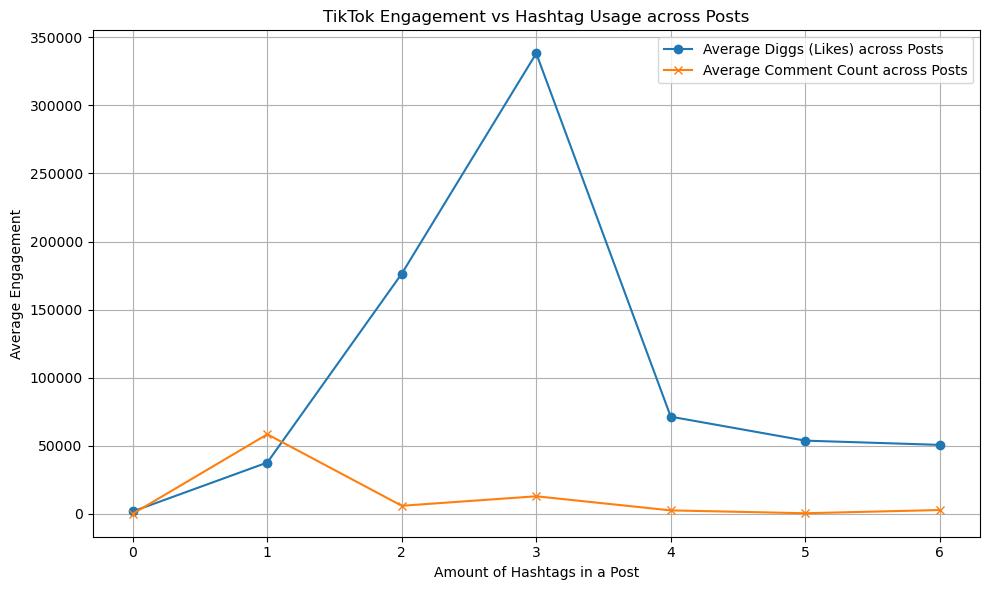

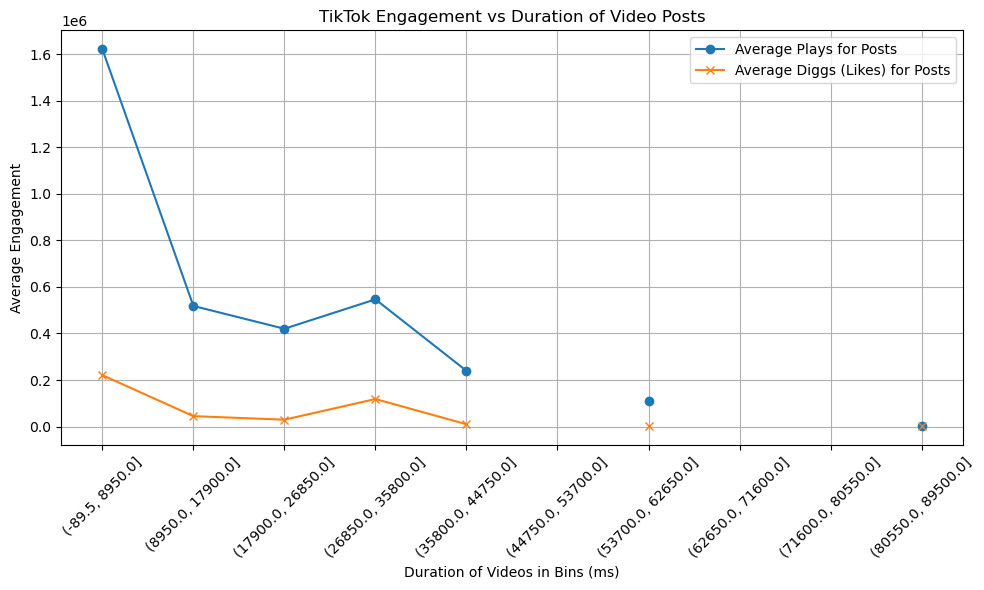

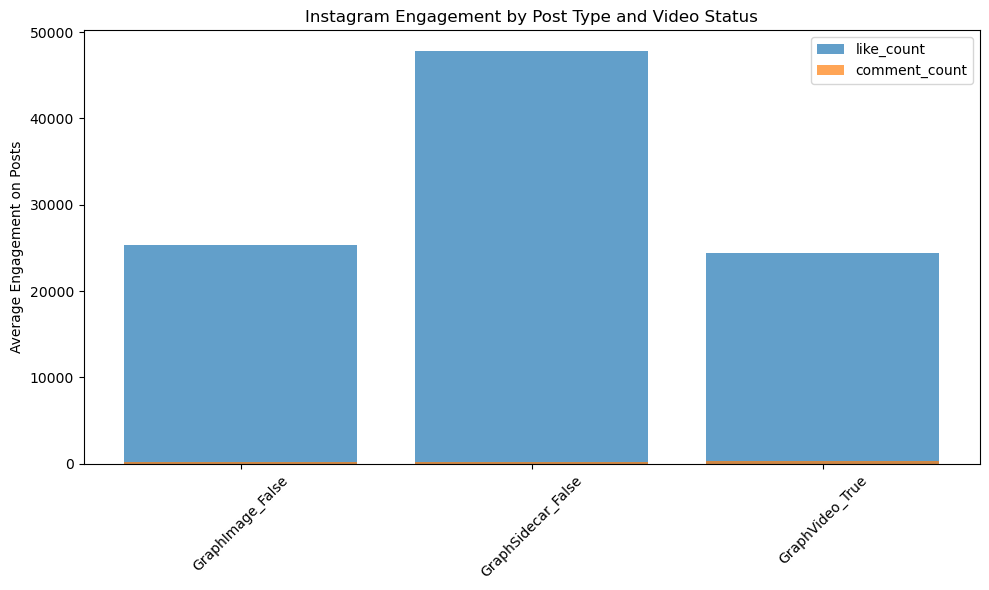

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Load in the dataframe:
tiktok_df = pd.read_csv("../../cleaned_tiktok_data.csv")
instagram_df = pd.read_csv("../../cleaned_instagram_data.csv")

#Double check and clean various columns once more for plotting purposes:
#Add in new columns for data visualizations:

#TikTok: Turn hashtag counts and durations into workable, numeric tools like ints and floats.
#If they cannot be converted, then apply NaN
tiktok_df["hashtag_count"] = pd.to_numeric(tiktok_df["hashtag_count"], errors='coerce')
tiktok_df["duration"] = pd.to_numeric(tiktok_df["duration"], errors="coerce")

#Instagram: Turn video post, paid partnership, and affiliate columns into booleans. 
instagram_df["is_video"] = instagram_df['is_video'].astype(bool)
instagram_df["is_paid_partnership"] = instagram_df['is_paid_partnership'].astype(bool)
instagram_df["is_affiliate"] = instagram_df['is_affiliate'].astype(bool)

#GPT: For more analysis, group the durations in TikTok into intervals
dur_bins = pd.cut(tiktok_df['duration'], bins=10)
dur_groupings = tiktok_df.groupby(dur_bins)[['play_count', 'digg_count']].mean().reset_index()
dur_groupings["duration_text"] = dur_groupings['duration'].astype(str)


#Now group the data for graphing purposes. We will have four graphs: 
#    1. TikTok: Hashtag Count vs Engagement
#    2. TikTok: Duration vs Engagement
#    3. Instagram: Engagement by Post Type with Video Status 


#1. TikTok: Hashtag Count vs Engagement
hashtag_grouping = tiktok_df.groupby('hashtag_count')[['digg_count', 'comment_count']].mean().reset_index()

#2. TikTok: Duration vs Engagement
#Done above

#3. Instagram: Engagement by Post Type with Video Status
instagram_grouping = instagram_df.groupby(['typename', 'is_video'])[['like_count', 'comment_count']].mean().reset_index()


#Plotting:
#1. TikTok: Hashtag Count vs Engagement
plt.figure(figsize=(10, 6))
plt.plot(hashtag_grouping['hashtag_count'], hashtag_grouping['digg_count'], label="Average Diggs (Likes) across Posts", marker="o")
plt.plot(hashtag_grouping['hashtag_count'], hashtag_grouping['comment_count'], label="Average Comment Count across Posts", marker="x")
plt.title("TikTok Engagement vs Hashtag Usage across Posts")
plt.xlabel("Amount of Hashtags in a Post")
plt.ylabel("Average Engagement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#2. TikTok: Duration vs Engagement
plt.figure(figsize=(10, 6))
plt.plot(dur_groupings['duration_text'], dur_groupings['play_count'], label="Average Plays for Posts", marker="o")
plt.plot(dur_groupings['duration_text'], dur_groupings['digg_count'], label="Average Diggs (Likes) for Posts", marker="x")
plt.title("TikTok Engagement vs Duration of Video Posts")
plt.xlabel("Duration of Videos in Bins (ms)")
plt.ylabel("Average Engagement")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#3. Instagram: Engagement by Post Type with Video Status
plt.figure(figsize=(10, 6))
for i, m in enumerate(['like_count', 'comment_count']):
    plt.bar(instagram_grouping['typename'] + "_" + instagram_grouping['is_video'].astype(str),
            instagram_grouping[m],
            label=m,
            alpha=0.7)
plt.xticks(rotation=45)
plt.title("Instagram Engagement by Post Type and Video Status")
plt.ylabel("Average Engagement on Posts")
plt.legend()
plt.tight_layout()
plt.show()